## Experiment 4c - Filters - Gaussian filter

Gaussian filter is an averaging filter, mainly used to remove the additive gaussian noise. This is how it looks like in time domain

In [1]:
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from directdemod import filters
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

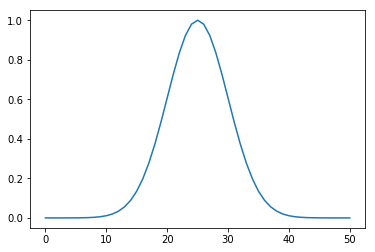

In [5]:
bh = filters.gaussian(51, 5)

plt.plot(bh.getB)

Let us observe in frequency domain. Assuming we have a sampling rate of 2MHz

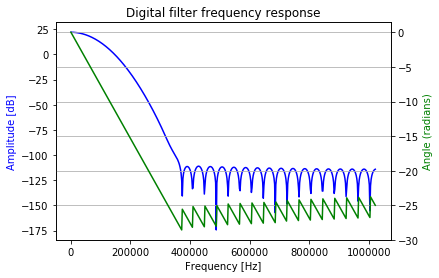

3dB point: 56000.0 Hz


In [6]:
bh = filters.gaussian(51, 5)

plt.plot(bh.getB)

w, h = signal.freqz(bh.getB)

Fs = 2048000
w *= Fs/(2*np.pi) 

plt.clf() 
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [Hz]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

hDB = 20 * np.log10(abs(h))
print("3dB point:", w[hDB < (hDB[0]-3)][0], "Hz")